In [1]:
from numpy import sin, cos, pi, exp, e
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')


<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Introducing the Discrete Fourier Transform

* **Course AIS2201 - Signalbehandling**
* **Week 37, 2024**
* **Lecturer: Kai Erik Hoff**


# Topics

* Recap:
    - Frequency domain representation
    - Sampling and frequency content
    - Fourier Series
* The DFT equation
    - What does it do?
    - What is the 'output'?

## Recap: frequency analysis

* Involves the transformation of a time-domain signal $x(t)$ to a frequency-domain representation $X(\omega)$
<img src="figures/Fig1_Frekvensanalyse.png" style="width: 70%; margin-left: 100px" />

## Recap: frequency domain representation




* Determining magnitude and whase for all component frequencies of a signal $x(t)$
* Accomplished by calculating the *fourier transform* of the signal $x(t)$

$$ X(\omega) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j \omega t} dt $$

* Fourier transformation results in a complex expression $X(\omega)$
    - Magnitude of a frequency component with angular frequency $\omega$ is $\left| X(\omega)\right|$
    - Phase of a frequency component with angular frequency $\omega$ is $\angle X(\omega)$.

## Interactive plot: frequency representation of sinusoid

D:\jupyter\AIS2201-Digital_Signal_Processing\AIS2201-Lecture_Notes\discrete_fourier_transform\..\demos\spectral_leakage.py:116: SyntaxWarning: invalid escape sequence '\p'
  self.AmpSpectrum.ax.set_xticklabels([str(round(x, 2)) + '$\pi$' for x in np.linspace(-1,1,9)])
D:\jupyter\AIS2201-Digital_Signal_Processing\AIS2201-Lecture_Notes\discrete_fourier_transform\..\demos\spectral_leakage.py:176: SyntaxWarning: invalid escape sequence '\p'
  self.AmpSpectrum.ax.set_title(r'$x[n] = \cos ('+str(F)+'\pi \cdot n)$ \n')
D:\jupyter\AIS2201-Digital_Signal_Processing\AIS2201-Lecture_Notes\discrete_fourier_transform\..\demos\spectral_leakage.py:269: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xticklabels([str(round(f,1))+'$\pi$' for f in np.linspace(-1, 1, 5)])
D:\jupyter\AIS2201-Digital_Signal_Processing\AIS2201-Lecture_Notes\discrete_fourier_transform\..\demos\spectral_leakage.py:280: SyntaxWarning: invalid escape sequence '\p'
  ax3.set_yticklabels([str(round(f,1))+'$\pi$' for f in np

Output()

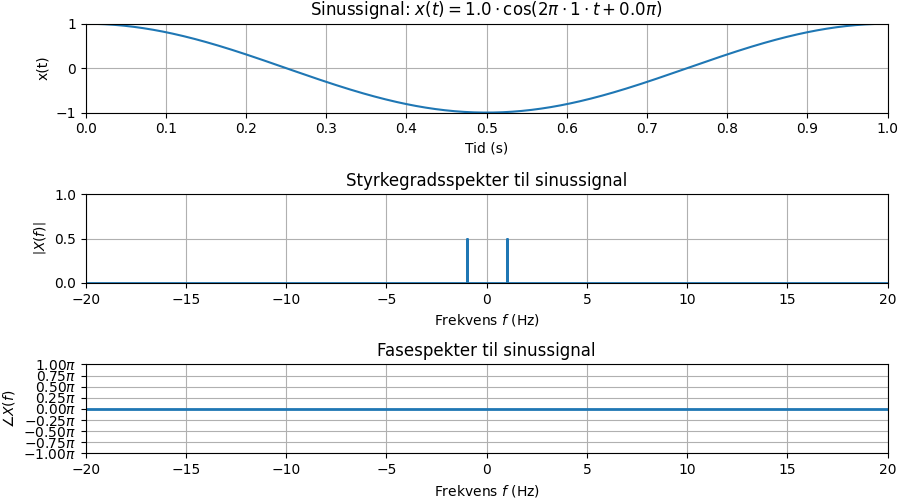

In [2]:
from demos import SinusoidSpectrumDemo
%matplotlib ipympl
SinusoidSpectrumDemo(1)

# Recap: discrete-time signals in the frequency domain

* Fourier transformation forms the basis for frequency analysis
* Obtained by computation
    - Finite number of datapoints
    - Discrete-time input $x[n]$
* Frequency analysis of a discrete-time signal $x[n]$ confined to $f \in \left( -\frac{f_s}{2},\frac{f_s}{2} \right)$
    - $\hat{\omega} \in (-\pi, \pi)$
 

<img src="figures/Fig9_SpectralSamling2.png" style="width: 70%; margin-left: 100px" />

## Recap: the Fourier Series







* A sequence of complex coefficients, where each coefficient $\boldsymbol{a}_k$ contains *magnitude* and *phase* information for it's respective quadrature signal: $|\boldsymbol{a}_k|\cdot e^{j(\omega_k \cdot t+ \angle \boldsymbol{a}_k)}$

* The frequency $\omega_k$ for each coefficient is determined by it's position $k$ in the sequence. $k$ represents the total number of cycles completed over the course of the signal's *fundamental period* $T_0$:

$$\omega_k = 2\pi \cdot \frac{k}{T_0}$$


* A discrete representation of a signal $x(t)$ in the frequency domain.

|$k:$|$\leftarrow \infty$|$-4$|$-3$|$-2$|$-1$|$0$|$1$|$2$|$3$|$4$|$\rightarrow \infty$|
|:--|--:|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|$a_k:$|$\frac{j}{k\pi}$ | $\frac{j}{4\pi}$|$\frac{j}{3\pi}$|$\frac{j}{2\pi}$|$\frac{j}{\pi}$|$0$|$\frac{-j}{\pi}$|$\frac{-j}{2\pi}$|$\frac{-j}{3\pi}$|$\frac{-j}{4\pi}$|$\frac{-j}{k\pi}$ |

* Fourier series can be visualized in a frequency plot.
    * Given $T_0 = \frac{1}{20} \text{s}$, the signal $x(t)$ will ***only*** contain frequency components at integer multiples of $f_0 = 20\text{Hz}$.
  

<img src="figures/FourierSeries.png" style="width: 60%; margin-left: 150px" />

# The "Fourier Pantheon"

<img src="figures/Fig3_FourierTransforms.png" style="width: 80%; margin-left: 100px" />

## Fourierrekke-dekomposisjon oppsummert

1. Observer et signal over et tidsvindu $T_0$.
2. Bruk frekvensforskyvning til å plukke ut sinusbølgene som fullfører 0, 1, 2, 3, 4, 5 osv... fulle perioder i løpet av tidsintervallet $T_0$.
3. Fortsetter i det uendelige.

* Vi kan gjøre *nesten* det samme med digitale signal.

# The Discrete Fourier Transform (DFT)

1. Signal is observed over a finite sample interval $N$
2. Extract magnitude and phase information for each quadrature component completing $m \in \mathbb{Z}$ full cycles over the course of $N$ samples

<img src="figures/Fig2_DFT_IO.png" style="width: 100%; margin-left: 0px" />

# The Discrete Fourier Transform(DFT)





* Definition:
$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$
    * Where $m$ is the *frequency index*

* Relationship between $m$ and normalized frequency

$$\hat{\omega}_m = \frac{2\pi \cdot m}{N}$$

* *Almost* the same principle as fourier series decomposition

* Results in frequency componets which make up the signal *window*  $x[n], n \in \{0, 1, 2, \ldots , N-1 \}$

* Output sequence $X[m]$ periodic over $N$ samples.

## Example: 

* Given the $N=4$ signal snippet $x[n], n \in \{0, 1, 2, 3 \}$ described below:
|$n$|$0$|$1$|$2$|$3$|
|---|---|---|---|---|
|$x[n]$|$3$|$2$|$1$|$2$|
    1. For how many values of $m$ do we need to calculate the DFT?
    2. What is the DFT sequence $X[m]$ for the chosen range of $m$?

## Code example:

$$X[m] = \sum_{n=0}^{N-1}x[n]\cdot e^{-j\cdot 2\pi \frac{m\cdot n}{N}} $$

* Based on the signal $x[n]$ from the previous example, use Python to calculate and display $X[m]$ for $m \in [-N, N]$
    * How should we organize the array representing $X[m]$?

X[-4] = 8.00 + j-0.00
X[-3] = 0.00 + j-2.00
X[-2] = 0.00 + j0.00
X[-1] = 0.00 + j2.00
X[0] = 8.00 + j0.00
X[1] = 0.00 + j-2.00
X[2] = 0.00 + j-0.00
X[3] = 0.00 + j2.00
X[4] = 8.00 + j0.00


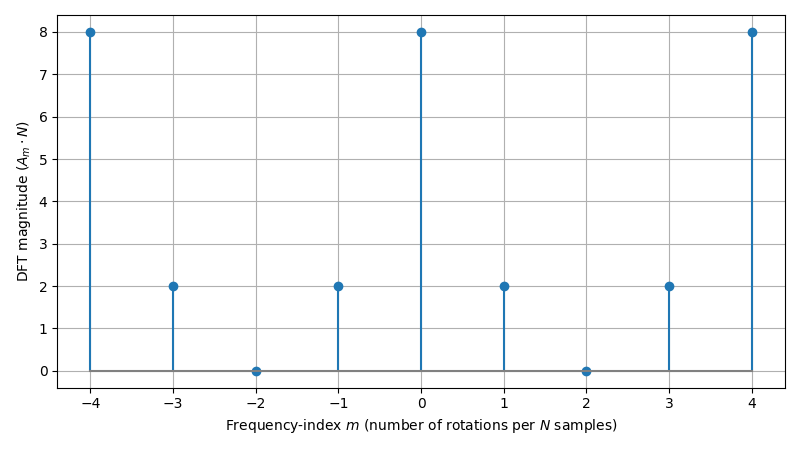

In [15]:
n = np.array([0, 1, 2, 3])
x = np.array([2, 3, 2, 1])
N = 4

m_vals = np.arange(-N, N+1)  # -N <= m <= N

X = np.zeros(len(m_vals), dtype=complex)

for i, m in enumerate(m_vals):
    X[i] = np.sum(x*e**(-2j*pi*m*n/N))
    print(f"X[{m}] = {X[i].real :.2f} + j{X[i].imag :.2f}")

plt.figure()
plt.stem(m_vals, np.abs(X), basefmt='grey')
plt.xticks(m_vals)
plt.xlabel("Frequency-index $m$ (number of rotations per $N$ samples)")
plt.ylabel(r"DFT magnitude ($A_m \cdot N$)")
plt.gca().set_xmargin(0.05)

## Questions?